## Getting the Essential Libraries

In [40]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
dataset = pd.read_csv('cleaned_dataset.csv')

In [3]:
dataset

,Target,Temperature Difference [C],Type,Failure Type,Rotational speed [rpm],Torque [Nm],Air temperature [C],Process temperature [C],Tool wear [min]
0,0.0,10.5,1.0,0.0,0.253968,0.200000,0.304348,0.358025,0.000000
1,0.0,10.5,0.0,0.0,-0.502646,0.459259,0.315217,0.370370,0.011858
2,0.0,10.4,0.0,0.0,-0.026455,0.688889,0.304348,0.345679,0.019763
3,0.0,10.4,0.0,0.0,-0.370370,-0.044444,0.315217,0.358025,0.027668
4,0.0,10.5,0.0,0.0,-0.502646,-0.007407,0.315217,0.370370,0.035573
...,...,...,...,...,...,...,...,...,...
9941,0.0,9.6,0.0,0.0,0.534392,-0.785185,0.380435,0.333333,0.055336
9942,0.0,9.7,0.0,0.0,0.682540,-0.614815,0.391304,0.333333,0.067194
9943,0.0,9.7,2.0,0.0,0.751323,-0.496296,0.402174,0.358025,0.086957
9944,0.0,9.7,2.0,0.0,-0.502646,0.622222,0.402174,0.370370,0.098814


## Train Test Split

In [6]:
X = dataset.drop(['Target', 'Failure Type'], axis=1)
y = dataset['Target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

### 1) Logistic Regression

Training Accuracy    : 96.71 %
Model Accuracy Score : 96.63 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1923
         1.0       0.00      0.00      0.00        67

    accuracy                           0.97      1990
   macro avg       0.48      0.50      0.49      1990
weighted avg       0.93      0.97      0.95      1990

--------------------------------------------------------


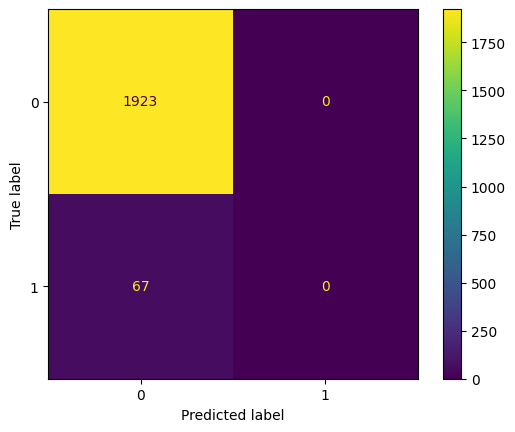

In [16]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_lr)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# Show the plot
plt.show()

### 2) Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.65 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.60      0.70      0.65        61

    accuracy                           0.98      2000
   macro avg       0.79      0.84      0.82      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


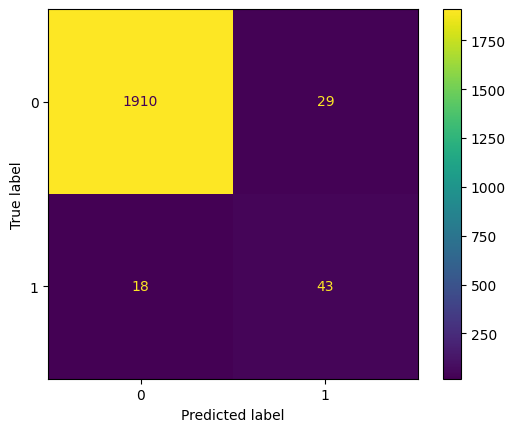

In [34]:
# Decision Tree
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_dec)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# Show the plot
plt.show()

### 3) Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.45 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.61      0.70        61

    accuracy                           0.98      2000
   macro avg       0.91      0.80      0.85      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


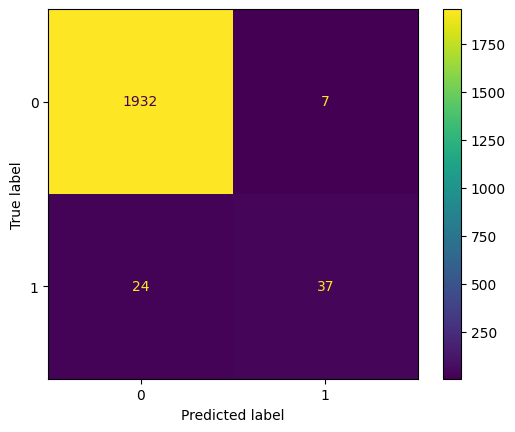

In [38]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_rf)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# Show the plot
plt.show()

### 4) Support Vector Machine

Training Accuracy    : 96.53 %
Model Accuracy Score : 96.95 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


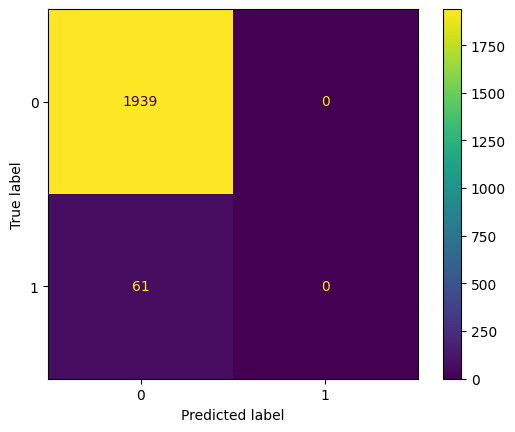

In [39]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_svc)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# Show the plot
plt.show()

## Results

In [41]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [56]:
pd.set_option('display.precision',2)
models_sorted = models.sort_values(by='Model Accuracy Score', ascending=False)

styled_models = models_sorted.style.background_gradient(cmap='coolwarm').set_properties(**{
    'font-family': 'Roboto',
    'color': 'Black',  # Correct spelling
    'font-size': '15px',
    'border': 'solid 1px black'
})

styled_models.hide(axis='index')

Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.000000,98.450000
Random Forest,100.000000,97.650000
Support Vector Machines,96.950000,97.350000
Logistic Regression,96.530000,96.950000


## Prediction

In [58]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[0 0 0 ... 0 1 0]


In [59]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
3666,0,0
7599,0,0
9535,0,0
1941,0,0
1793,0,0
